# 積分による三角関数・対数関数の定義の実装

本ノートブックでは、積分による定義から π と e の値を数値計算で確認します。

## 1. π の定義

$$\pi = 2\int_0^1 \frac{dt}{\sqrt{1-t^2}}$$

In [4]:
using QuadGK

# π の計算
# ∫₀¹ 1/√(1-t²) dt を数値積分
integral_pi, error = quadgk(t -> 1/sqrt(1 - t^2), 0, 1)
pi_calculated = 2 * integral_pi

println("積分による π の値: ", pi_calculated)
println("Julia の π の値:    ", Float64(pi))
println("誤差:              ", abs(pi_calculated - π))
println("積分の推定誤差:     ", 2 * error)

積分による π の値: 3.14159262139778
Julia の π の値:    3.141592653589793
誤差:              3.2192013055265534e-8
積分の推定誤差:     4.5935325246475664e-8


## 2. e の定義

$$e = \exp(1)$$

ここで $\exp(t)$ は $\log x = \int_1^x \frac{ds}{s}$ の逆関数です。

$\log e = 1$ となる $e$ を求めるため、$\int_1^x \frac{ds}{s} = 1$ を満たす $x$ を探します。

In [6]:
# log(x) = ∫₁ˣ 1/s ds を計算する関数
function log_integral(x)
    if x == 1
        return 0.0
    end
    integral, _ = quadgk(s -> 1/s, 1, x)
    return integral
end

# log(e) = 1 となる e を二分法で求める
function find_e()
    # 初期区間 [2, 3]
    a, b = 2.0, 3.0
    tolerance = 1e-10
    
    while b - a > tolerance
        mid = (a + b) / 2
        log_mid = log_integral(mid)
        
        if log_mid < 1
            a = mid
        else
            b = mid
        end
    end
    
    return (a + b) / 2
end

e_calculated = find_e()

println("積分による e の値: ", e_calculated)
println("Julia の ℯ の値:   ", ℯ |> Float64)
println("誤差:             ", abs(e_calculated - ℯ))
println("\n検証: log(e) = ", log_integral(e_calculated))

積分による e の値: 2.7182818284782115
Julia の ℯ の値:   2.718281828459045
誤差:             1.9166446207918852e-11

検証: log(e) = 1.000000000007051


## 3. 角度 θ と正弦関数

$$\theta = \int_0^y \frac{dt}{\sqrt{1-t^2}}$$

$$y = \sin\theta$$

In [7]:
# y から θ を計算（弧長の積分）
function y_to_theta(y)
    if y == 0
        return 0.0
    end
    integral, _ = quadgk(t -> 1/sqrt(1 - t^2), 0, y)
    return integral
end

# θ から y を計算（逆関数として sin を定義）
function theta_to_y(theta)
    # 二分法で y を探す: y_to_theta(y) = theta
    if theta == 0
        return 0.0
    end
    
    a, b = 0.0, 1.0
    tolerance = 1e-10
    
    while b - a > tolerance
        mid = (a + b) / 2
        theta_mid = y_to_theta(mid)
        
        if theta_mid < theta
            a = mid
        else
            b = mid
        end
    end
    
    return (a + b) / 2
end

# テスト: θ = π/6 (30度) のとき sin(π/6) = 0.5
theta_test = pi_calculated / 6
sin_calculated = theta_to_y(theta_test)

println("θ = π/6 のとき")
println("積分による sin(π/6): ", sin_calculated)
println("Julia の sin(π/6):   ", sin(π/6))
println("誤差:                ", abs(sin_calculated - sin(π/6)))

# 逆も確認
println("\ny = 0.5 のとき")
theta_from_y = y_to_theta(0.5)
println("積分による θ:   ", theta_from_y)
println("asin(0.5):     ", asin(0.5))
println("π/6:           ", π/6)
println("誤差:          ", abs(theta_from_y - π/6))

θ = π/6 のとき
積分による sin(π/6): 0.49999999537249096
Julia の sin(π/6):   0.49999999999999994
誤差:                4.627508987109508e-9

y = 0.5 のとき
積分による θ:   0.5235987755982989
asin(0.5):     0.5235987755982989
π/6:           0.5235987755982988
誤差:          1.1102230246251565e-16


## 4. 扇形の面積

$$S = \frac{1}{2}\theta$$

In [8]:
# 扇形の面積を直接計算
function sector_area(y)
    # ∫₀ʸ √(1-t²) dt - (1/2)y√(1-y²)
    integral, _ = quadgk(t -> sqrt(1 - t^2), 0, y)
    return integral - 0.5 * y * sqrt(1 - y^2)
end

# テスト: y = 0.5 (θ = π/6) の場合
y_test = 0.5
theta_test = y_to_theta(y_test)
area_direct = sector_area(y_test)
area_formula = 0.5 * theta_test

println("y = 0.5 のとき")
println("θ = ", theta_test)
println("直接計算した扇形の面積: ", area_direct)
println("θ/2 による面積:        ", area_formula)
println("誤差:                  ", abs(area_direct - area_formula))

y = 0.5 のとき
θ = 0.5235987755982989
直接計算した扇形の面積: 0.26179938779914946
θ/2 による面積:        0.26179938779914946
誤差:                  0.0


## 5. 可視化

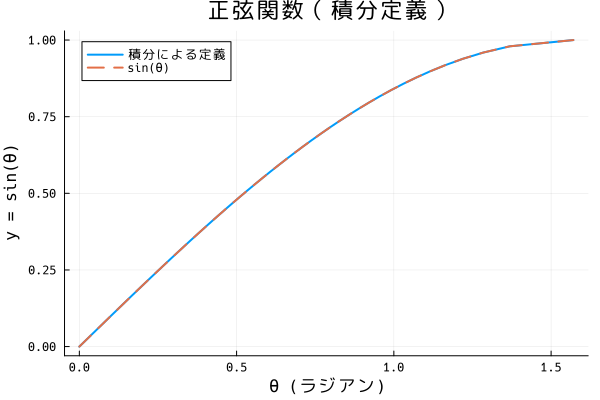

In [10]:
using Plots
using PlotsGRBackendFontJaEmoji
# y vs θ のグラフ（sin関数）
y_values = range(0, 1, length=50)
theta_values = [y_to_theta(y) for y in y_values]

plot(theta_values, y_values, 
     label="積分による定義", 
     xlabel="θ (ラジアン)", 
     ylabel="y = sin(θ)",
     title="正弦関数（積分定義）",
     linewidth=2,
     legend=:topleft)

# Julia の sin 関数と比較
plot!(theta_values, sin.(theta_values), 
      label="sin(θ)", 
      linestyle=:dash,
      linewidth=2)

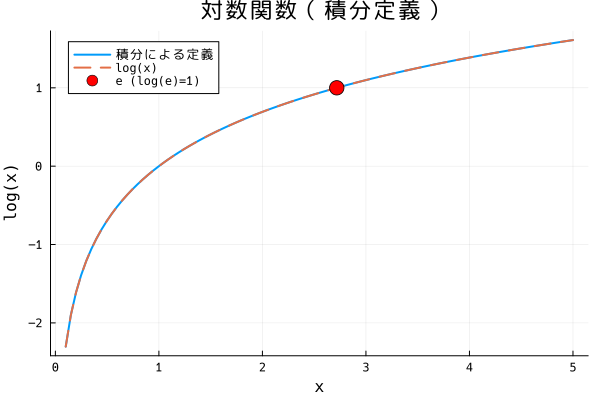

In [11]:
# x vs log(x) のグラフ
x_values = range(0.1, 5, length=100)
log_values = [log_integral(x) for x in x_values]

plot(x_values, log_values, 
     label="積分による定義", 
     xlabel="x", 
     ylabel="log(x)",
     title="対数関数（積分定義）",
     linewidth=2,
     legend=:topleft)

# Julia の log 関数と比較
plot!(x_values, log.(x_values), 
      label="log(x)", 
      linestyle=:dash,
      linewidth=2)

# e の位置を示す
scatter!([e_calculated], [1.0], 
        label="e (log(e)=1)", 
        markersize=8,
        color=:red)